## K-Nearest Neighbor Classification Algorithm
**K-nearest neighbor (KNN)** is an unsupervised machine learning algorithm used for classification and regression. It works by finding the k-closest points to a given data point in the feature space and then assigning the data point a label based on the labels of the neighboring points. KNN can be used for both supervised and unsupervised learning tasks. It is also a non-parametric algorithm, meaning it does not make assumptions about the distribution of data.

In [1]:
# Load the dataset of iris flowers:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

In [2]:
# To check which columns we have in the dataset:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
# To see the target names:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
# Let's see the feature_names:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# Let's create the DataFrame from the feature_names:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
# To add the target column to the DataFrame:
df["target"] =  iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
# Now to plot the scatter plot of the DataFrame, let's create three DataFrames, each DataFrame for each color:
df1 = df[df.target == 0]
df2 = df[df.target == 1]
df3 = df[df.target == 2]

In [13]:
# To plot each DataFrame, we need to import matplotlib:
from matplotlib import pyplot as plt
%matplotlib inline

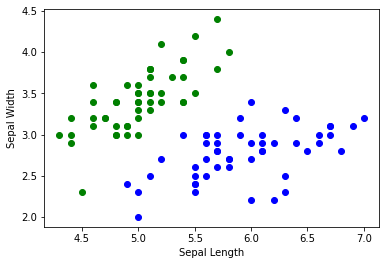

In [15]:
# Let's plot the scatter plot:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="green")
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'],color="blue")

In [16]:
# Now let's split the dataset into train and test samples:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (iris.data, iris.target, test_size = 0.2)

In [17]:
# Train samples:
len(x_train)

120

In [18]:
# Test samples:
len(x_test)

30

In [40]:
# Now the datasets are ready, let's call the model:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [41]:
# To train the model:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [42]:
# See the score of the model:
knn.score(x_test, y_test)

0.9666666666666667

In [44]:
# Let's see the prediction using confusion matrix:
from sklearn.metrics import confusion_matrix
y_predicted = knn.predict(x_test)

cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 9,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 10]], dtype=int64)

Text(42.0, 0.5, 'Truth')

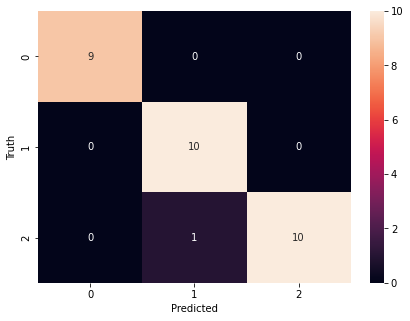

In [45]:
# To see some clear understanding:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [47]:
# To print classification report for precesion, recall and f1-score for each classes:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.91      1.00      0.95        10
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### Exercise
From sklearn.datasets load digits dataset and do following

    1. Classify digits (0 to 9) using KNN classifier. You can use different values for k neighbors and need to figure out a value of K that gives you a maximum score. You can manually try different values of K or use gridsearchcv
    2. Plot confusion matrix
    3. Plot classification report